In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date=20230101&end_date=20230701&station=9414290&product=hourly_height&datum=MLLW&time_zone=lst&units=metric&application=DataAPI_Sample&format=csv')
data.index = pd.to_datetime(data['Date Time'], format="%Y-%m-%d %H:%M")
print(data.head())
print(data.shape)

                            Date Time   Water Level   Sigma   I   L 
Date Time                                                           
2023-01-01 00:00:00  2023-01-01 00:00         0.798   0.039   0    0
2023-01-01 01:00:00  2023-01-01 01:00         0.801   0.044   0    0
2023-01-01 02:00:00  2023-01-01 02:00         0.955   0.046   0    0
2023-01-01 03:00:00  2023-01-01 03:00         1.152   0.043   0    0
2023-01-01 04:00:00  2023-01-01 04:00         1.440   0.032   0    0
(4368, 5)


In [3]:
water_level = data[' Water Level']

In [4]:
def df_to_X_y(df, window_size=10):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)
        

In [5]:
WINDOW_SIZE = 10
X, y = df_to_X_y(water_level, WINDOW_SIZE)
print(X.shape)
print(y.shape)

(4358, 10, 1)
(4358,)


In [6]:
X_train, y_train = X[:4000], y[:4000]
X_val, y_val = X[4000:], y[4000:]
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(4000, 10, 1) (4000,)
(358, 10, 1) (358,)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [8]:
model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

2023-09-07 14:35:30.231644: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [9]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [10]:
model1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=25, callbacks = [cp])

2023-09-07 14:35:31.350969: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
125/125 [==============================] - 5s 16ms/step - loss: 0.9524 - root_mean_squared_error: 0.9759 - val_loss: 0.5708 - val_root_mean_squared_error: 0.7555


2023-09-07 14:35:39.555485: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 2/25
125/125 [==============================] - 1s 12ms/step - loss: 0.4235 - root_mean_squared_error: 0.6508 - val_loss: 0.3516 - val_root_mean_squared_error: 0.5929


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 3/25
125/125 [==============================] - 2s 15ms/step - loss: 0.3476 - root_mean_squared_error: 0.5896 - val_loss: 0.3121 - val_root_mean_squared_error: 0.5587


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 4/25
125/125 [==============================] - 2s 13ms/step - loss: 0.3075 - root_mean_squared_error: 0.5545 - val_loss: 0.2696 - val_root_mean_squared_error: 0.5193


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 5/25
125/125 [==============================] - 2s 14ms/step - loss: 0.2673 - root_mean_squared_error: 0.5170 - val_loss: 0.2257 - val_root_mean_squared_error: 0.4750


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 6/25
125/125 [==============================] - 2s 14ms/step - loss: 0.2195 - root_mean_squared_error: 0.4685 - val_loss: 0.1726 - val_root_mean_squared_error: 0.4154


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 7/25
125/125 [==============================] - 2s 12ms/step - loss: 0.1692 - root_mean_squared_error: 0.4114 - val_loss: 0.1254 - val_root_mean_squared_error: 0.3541


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 8/25
125/125 [==============================] - 2s 12ms/step - loss: 0.1223 - root_mean_squared_error: 0.3496 - val_loss: 0.0788 - val_root_mean_squared_error: 0.2807


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 9/25
125/125 [==============================] - 1s 12ms/step - loss: 0.0657 - root_mean_squared_error: 0.2563 - val_loss: 0.0432 - val_root_mean_squared_error: 0.2078


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 10/25
125/125 [==============================] - 1s 12ms/step - loss: 0.0368 - root_mean_squared_error: 0.1918 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1674


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 11/25
125/125 [==============================] - 2s 15ms/step - loss: 0.0235 - root_mean_squared_error: 0.1534 - val_loss: 0.0223 - val_root_mean_squared_error: 0.1493


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 12/25
125/125 [==============================] - 1s 12ms/step - loss: 0.0197 - root_mean_squared_error: 0.1403 - val_loss: 0.0206 - val_root_mean_squared_error: 0.1434


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 13/25
125/125 [==============================] - 1s 12ms/step - loss: 0.0177 - root_mean_squared_error: 0.1329 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1348


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 14/25
125/125 [==============================] - 2s 17ms/step - loss: 0.0161 - root_mean_squared_error: 0.1269 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1305


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 15/25
125/125 [==============================] - 2s 13ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 0.0148 - val_root_mean_squared_error: 0.1218


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 16/25
125/125 [==============================] - 2s 14ms/step - loss: 0.0132 - root_mean_squared_error: 0.1149 - val_loss: 0.0133 - val_root_mean_squared_error: 0.1155


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 17/25
125/125 [==============================] - 1s 10ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1124


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 18/25
125/125 [==============================] - 2s 13ms/step - loss: 0.0108 - root_mean_squared_error: 0.1040 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1072


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 19/25
125/125 [==============================] - 2s 14ms/step - loss: 0.0098 - root_mean_squared_error: 0.0989 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0995


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 20/25
125/125 [==============================] - 2s 14ms/step - loss: 0.0088 - root_mean_squared_error: 0.0940 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 21/25
125/125 [==============================] - 2s 14ms/step - loss: 0.0080 - root_mean_squared_error: 0.0895 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0918


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 22/25
125/125 [==============================] - 2s 13ms/step - loss: 0.0072 - root_mean_squared_error: 0.0850 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0854


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 23/25
125/125 [==============================] - 1s 9ms/step - loss: 0.0065 - root_mean_squared_error: 0.0808 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0804


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 24/25
125/125 [==============================] - 1s 9ms/step - loss: 0.0058 - root_mean_squared_error: 0.0763 - val_loss: 0.0059 - val_root_mean_squared_error: 0.0769


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 25/25
125/125 [==============================] - 1s 10ms/step - loss: 0.0053 - root_mean_squared_error: 0.0726 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0746


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [11]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

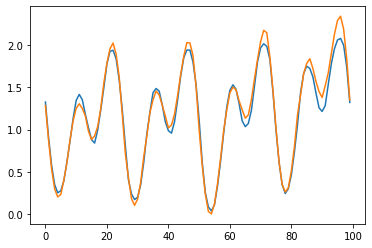

In [12]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Train Actuals':y_train})
plt.figure()
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Train Actuals'][:100])
plt.show()

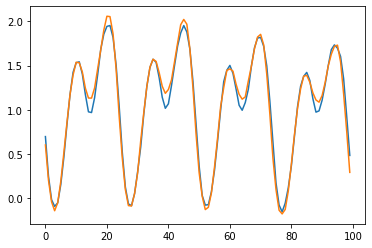

In [13]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Val Actuals':y_val})
plt.figure()
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Val Actuals'][:100])
plt.show()